### Problem Statement
Wine is the fermented juice of grapes, made in many varieties, such as red, white, sweet, dry, still, and sparkling, for use as a beverage, in cooking, in religious rites, etc., and usually having an alcoholic content of 14 percent or less. The wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality wine indicators and generate insights into each of these factors to our model’s wine quality.

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,accuracy_score
from sklearn.metrics import auc,make_scorer,precision_recall_curve,log_loss
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import PowerTransformer, Normalizer
from sklearn.feature_selection import mutual_info_regression
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import skew, kurtosis
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data into a dataframe
wine_df = pd.read_csv("WineQT.csv")
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [3]:
# Check the dimension of the table
print("The dimension of the table is: ", wine_df.shape)

# What type of variables are in the table 
print("Describe Data")
print(wine_df.describe())

The dimension of the table is:  (1143, 13)
Describe Data
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.0

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
# Check if any missing values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

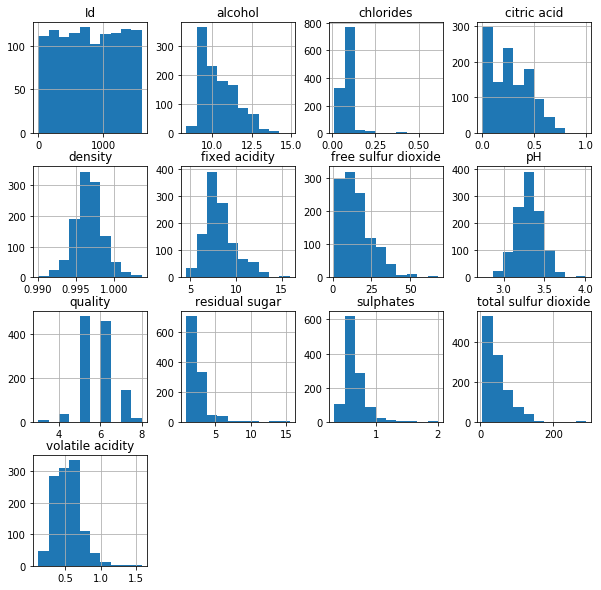

In [6]:
wine_df.hist(figsize=(10,10))
plt.show()

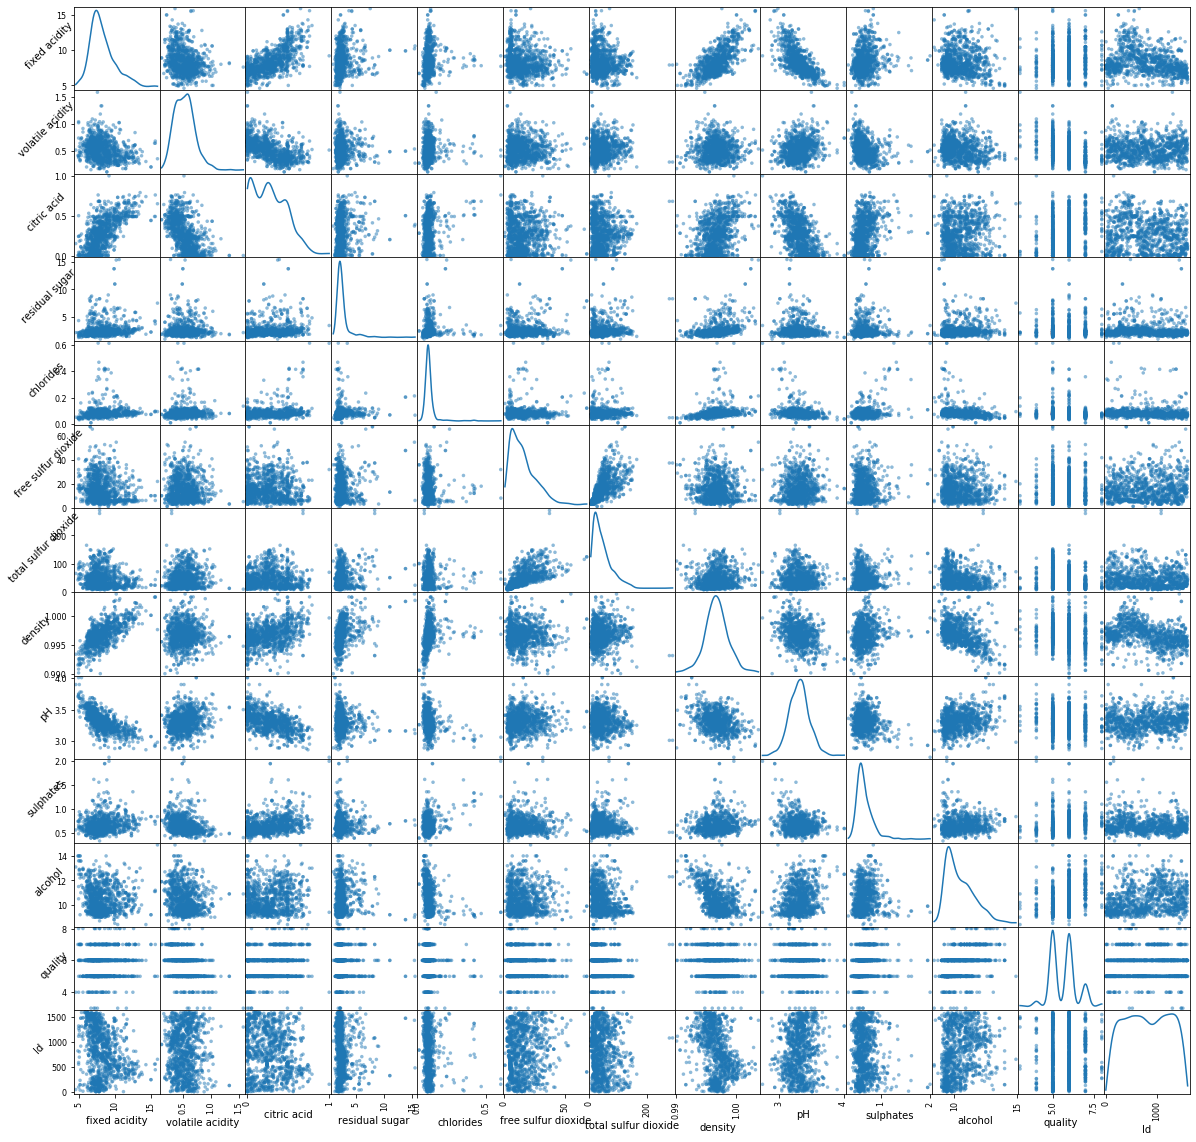

In [7]:
# Scatter plot of the variables
axes = pd.plotting.scatter_matrix(wine_df, figsize=(20, 20), s=50, diagonal='kde')
for ax in axes.flatten():
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=45)
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)

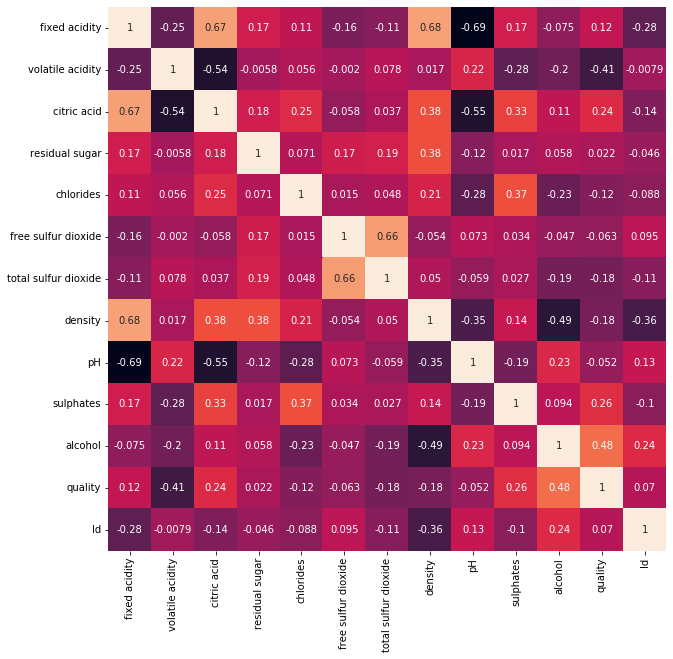

In [8]:
# Correlation of the variables
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(wine_df.corr(),annot=True,cbar=False,ax=ax)
plt.show()

In [9]:
y = wine_df['quality']
x = wine_df.drop('quality', axis = 1)

In [10]:
# Feature selection using SelectKBest feature selection
skbest = SelectKBest(k=12)
skbest.fit(x,y)
x_skbest=skbest.transform(x)
x_skbest.shape

(1143, 12)

In [11]:
# 10 best features using SelectKBest
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(12,'Score'))         # print 12 best features

            Feature_Name      Score
10               alcohol  82.747058
1       volatile acidity  47.937979
9              sulphates  18.049074
2            citric acid  17.705465
6   total sulfur dioxide  15.270771
7                density   8.544380
0          fixed acidity   4.314182
8                     pH   4.149650
4              chlorides   3.690383
11                    Id   3.288904
5    free sulfur dioxide   2.692791
3         residual sugar   1.234693


In [12]:
x = x.drop(columns=['fixed acidity','pH','free sulfur dioxide','chlorides', 'density','residual sugar','Id'])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
# Details of training dataset
print("Shape of x_train dataset: ", x_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of x_test dataset: ", x_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of x_train dataset:  (800, 5)
Shape of y_train dataset:  (800,)
Shape of x_test dataset:  (343, 5)
Shape of y_test dataset:  (343,)


### Model Evaluation

In [15]:
def get_model_score(pipe, data_x, data_y, cv=5):
    cv_score = cross_val_score(pipe, data_x, data_y, cv=cv)
    return np.mean(cv_score), np.std(cv_score)

def get_pipeline(*additional_pipe_steps, model):
    pipe_steps = [PowerTransformer(method='yeo-johnson'), Normalizer(norm='l2')]
    pipe_steps.extend(additional_pipe_steps)
    return make_pipeline(*pipe_steps,
                         TransformedTargetRegressor(regressor=model, 
                                                    transformer=PowerTransformer(method='yeo-johnson')))

In [16]:
def evaluate_model(pipe, X, y):
    y_pred, y_true = np.empty(len(y)), np.empty(len(y))
    loo = LeaveOneOut()
    for i, (train_idx, test_idx) in tqdm(enumerate(loo.split(X)), total=len(y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        y_pred[i] = pipe.fit(X_train, y_train).predict(X_test)[0]
        y_true[i] = y_test
    return r2_score(y_true, y_pred), np.sqrt(mean_squared_error(y_true, y_pred))

In [17]:
pipe = get_pipeline(PCA(n_components=5), model=LinearRegression())
model_score, score_std = get_model_score(pipe=pipe, data_x=x, data_y=y, cv=5)
r2, rmse = evaluate_model(pipe, x, y)
print('Linear Regression Model Score: ', model_score)
print('Linear Regression SD Score: ',score_std)
print('R Square: ', r2)
print('Root Mean Sqaure: ', rmse)

100%|██████████| 1143/1143 [01:12<00:00, 15.71it/s]

Linear Regression Model Score:  0.2915459444263656
Linear Regression SD Score:  0.029268572360845152
R Square:  0.3350070218364951
Root Mean Sqaure:  0.656838798694942


In [18]:
pipe = get_pipeline(PCA(n_components=5), model=RandomForestRegressor())
model_score, score_std = get_model_score(pipe=pipe, data_x=x, data_y=y, cv=5)
r2, rmse = evaluate_model(pipe, x, y)
print('Random Forest Regressor Model Score: ',model_score)
print('Random Forest Regressor SD Score: ',score_std)
print('R Square: ', r2)
print('Root Mean Sqaure: ', rmse)

100%|██████████| 1143/1143 [13:44<00:00,  1.39it/s] 

Random Forest Regressor Model Score:  0.24549288362476976
Random Forest Regressor SD Score:  0.06126130522848122
R Square:  0.4197712193993324
Root Mean Sqaure:  0.6135499172311915


In [19]:
def model_evaluation(model, x_train, y_train, x_test, y_test):   
    mod = model.fit(x_train, y_train)
    mod_pred = model.predict(x_test)    
    return accuracy_score(y_test, mod_pred), np.sqrt(mean_squared_error(y_test, mod_pred))

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model_score, score_std = model_evaluation(model, x_train, y_train, x_test, y_test)
#r2, rmse = evaluate_model(pipe, x, y)
print('Random Forest Classifier Model Score: ',model_score)
print('Root Mean Sqaure: ', rmse)

Random Forest Classifier Model Score:  0.6326530612244898
Root Mean Sqaure:  0.6135499172311915


In [22]:
model=DecisionTreeClassifier()
model_score, score_std = model_evaluation(model, x_train, y_train, x_test, y_test)
#r2, rmse = evaluate_model(pipe, x, y)
print('Decision Tree Classifier Model Score: ',model_score)
print('Root Mean Sqaure: ', rmse)

Decision Tree Classifier Model Score:  0.5451895043731778
Root Mean Sqaure:  0.6135499172311915
